Enunciado: Escribe una función llamada scrape_coches_ocasion que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. La función realizará las siguientes tareas:


1.Realizará una solicitud HTTP GET a la siguiente url: https://www.ocasionplus.com/coches-ocasion/v2?orderBy=morePopular

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re


# URL de la página web con la información de coches de ocasión

url = "https://www.ocasionplus.com/coches-ocasion/v2?orderBy%3DmorePopular"

res = requests.get(url)


2.Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará None.

In [2]:
# Comprobar el código de estado
if res.status_code != 200:
    print(f"Error: La solicitud no pudo ser completada. Código de estado: {res.status_code}")
else:
    print(f"Código de estado: {res.status_code}")
   


Código de estado: 200


<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link as="font" crossorigin="" href="/hera/_next/static/media/351a934e96d2300f-s.p.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="" href="/hera/_next/static/media/e1c529c04de64b40-s.p.woff2" rel="preload" type="font/woff2"/><link as="image" href="/hera/icons/home.svg" rel="preload"/><link as="image" href="/hera/icons/filters/car.svg" rel="preload"/><link as="image" href="/hera/icons/filters/motorbike.svg" rel="preload"/><link as="image" href="/hera/icons/ribbon.svg" rel="preload"/><link as="image" href="/hera/icons/favourite.svg" rel="preload"/><link as="image" href="/hera/icons/C.svg" rel="preload"/><link as="image" href="/hera/icons/adSell.svg" rel="preload"/><link as="image" href="/hera/icons/B.svg" rel="preload"/><link as="image" href="/hera/icons/ECO.svg" rel="preload"/><link as="image" href="/hera/icons/adHelp.svg" rel="preload"/>
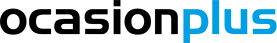

In [3]:
# Parsear el contenido HTML
soup = BeautifulSoup(res.content, "html.parser")
print(soup)

3.Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

In [4]:
lista_coches = soup.find_all('span', {'class':"cardVehicle_spot__e6YZx"})
# print(lista_coches)

In [5]:
# Creamos la lista vacía donde se almacenarán los nombres de los coches limpios.
coche = []
# Definimos un patrón de expresión regular que busca coincidencias de una o más letras en mayúsculas o minúsculas 
# (incluidas las que lleven tilde), seguidas o no (*) de espacio y de ninguno a 4 dígitos
patron = r'[a-zA-ZÁáÉéÍíÓóÚúÜü]+\s*\d{0,4}'

# Iteramos sobre cada elemento en la lista de nombres de coches obtenida anteriormente.
for nombre in lista_coches:
    # Extraemos el texto del elemento actual en el bucle.
    nombre_texto = nombre.text  
    # Buscamos todas las coincidencias del patrón en el texto del nombre del coche.
    coincid_abc = re.findall(patron, nombre_texto)
    # Unimos todas las coincidencias encontradas en una sola cadena, separadas por un espacio.
    coche_texto = ' '.join(coincid_abc)
    # Verificamos si la cadena resultante no está vacía, .
    if coche_texto != '':
        # Si la cadena no está vacía, se agrega a la lista "coche".
        coche.append(coche_texto)

print(coche)

['Seat  Arona', 'Seat  Ibiza', 'Audi  A3', 'Skoda  Kodiaq', 'Mazda  CX', 'Renault  Captur', 'Peugeot 308', 'Mazda  Mazda3', 'Hyundai  i30', 'Hyundai  Tucson', 'Skoda  Superb', 'Toyota  Corolla', 'Renault  Mégane', 'Hyundai  Tucson', 'Citro n  C Elysée', 'Renault  Mégane', 'BMW  Serie 1', 'BMW  Serie 1', 'Fiat 500 C', 'Fiat 500 C']


In [6]:
lista_precios_rebajados = soup.find_all('span', {'class':"cardVehicle_finance__SG6JV"})
print(lista_precios_rebajados)

[<span class="cardVehicle_finance__SG6JV">1.0 TSI Ecomotive S&amp;S Style Edition (95 CV)</span>, <span class="cardVehicle_finance__SG6JV">14.363€</span>, <span class="cardVehicle_finance__SG6JV">1.2 TSI Style Connect (90 CV)</span>, <span class="cardVehicle_finance__SG6JV">9.272€</span>, <span class="cardVehicle_finance__SG6JV">Sportback ALL-IN edition 35 TDI (150 CV) S LINE</span>, <span class="cardVehicle_finance__SG6JV">21.772€</span>, <span class="cardVehicle_finance__SG6JV">2.0 TDI Ambition 4x2 DSG (150 CV) 7 Plazas</span>, <span class="cardVehicle_finance__SG6JV">20.900€</span>, <span class="cardVehicle_finance__SG6JV">2.0 G Zenith 2WD (165 CV)</span>, <span class="cardVehicle_finance__SG6JV">18.172€</span>, <span class="cardVehicle_finance__SG6JV">Zen Energy TCe (120 CV) EDC</span>, <span class="cardVehicle_finance__SG6JV">14.045€</span>, <span class="cardVehicle_finance__SG6JV">BlueHDi 130 S&amp;S Allure (130 CV)</span>, <span class="cardVehicle_finance__SG6JV">14.536€</span>,

In [7]:
precio_rebajado = []
# El patrón busca un dígito '\d' de entre 1 y 3 cifras '{1,3}' seguido de un . éste a su vez seguido de 3 cifras y del símbolo €
patron = re.compile(r'\d{1,3}\.\d{3}€')

#Iteramos por la lista de precios rebajados
for precio in lista_precios_rebajados:
    #para aplicar la búsqueda 
    numeros = patron.findall(precio.text)
    # Agregamos a la lista de precios reducidos
    precio_rebajado.extend(numeros)

# Imprimimos los precios separados por una coma
precios_lista = ', '.join([str(precio) for precio in precio_rebajado])
print(precios_lista)
# len(precios_lista)

14.363€, 9.272€, 21.772€, 20.900€, 18.172€, 14.045€, 14.536€, 5.490€, 12.227€, 18.909€, 20.727€, 21.727€, 21.354€, 22.909€, 9.545€, 12.909€, 20.318€, 12.900€, 12.636€, 12.545€


In [8]:
lista_precios_originales = soup.find_all('span', {'class':"cardVehicle_spot__e6YZx"})
print(lista_precios_originales)

[<span class="cardVehicle_spot__e6YZx">Seat Arona</span>, <span class="cardVehicle_spot__e6YZx">15.800€</span>, <span class="cardVehicle_spot__e6YZx">Seat Ibiza</span>, <span class="cardVehicle_spot__e6YZx">10.200€</span>, <span class="cardVehicle_spot__e6YZx">Audi A3</span>, <span class="cardVehicle_spot__e6YZx">23.950€</span>, <span class="cardVehicle_spot__e6YZx">Skoda Kodiaq</span>, <span class="cardVehicle_spot__e6YZx">22.990€</span>, <span class="cardVehicle_spot__e6YZx">Mazda CX-5</span>, <span class="cardVehicle_spot__e6YZx">19.990€</span>, <span class="cardVehicle_spot__e6YZx">Renault Captur</span>, <span class="cardVehicle_spot__e6YZx">Peugeot 308</span>, <span class="cardVehicle_spot__e6YZx">15.990€</span>, <span class="cardVehicle_spot__e6YZx">Mazda Mazda3</span>, <span class="cardVehicle_spot__e6YZx">Hyundai i30</span>, <span class="cardVehicle_spot__e6YZx">13.450€</span>, <span class="cardVehicle_spot__e6YZx">Hyundai Tucson</span>, <span class="cardVehicle_spot__e6YZx">20

In [9]:
precio_original = []
patron = re.compile(r'\d{1,3}\.\d{3}€')

for precio in lista_precios_originales:
    numeros = patron.findall(precio.text)
    #Agregamos los números a la lista de precios reducidos
    precio_original.extend(numeros)

# Imprimir los precios reducidos como números
precios_lista = ', '.join([str(precio) for precio in precio_original])
print(precios_lista)
len(precios_lista)


15.800€, 10.200€, 23.950€, 22.990€, 19.990€, 15.990€, 13.450€, 20.800€, 22.800€, 23.900€, 23.490€, 25.200€, 10.500€, 14.200€, 22.350€, 13.900€, 13.800€


151

In [10]:
lista_km = soup.find_all('span', class_='characteristics_elements__Mb1S_')
# print(lista_km)
# len(lista_km)

In [11]:
km = []

patron = re.compile(r'\d{1,3}(?:\.\d{3}) Km')

for kms in lista_km:
    kilom = patron.findall(kms.text)
    #Agregamos los números a la lista de precios reducidos
    km.extend(kilom)

# Imprimir los precios reducidos como números
km_lista = ', '.join([str(kms) for kms in km])
print(km_lista)
# len(km_lista)

9.664 Km, 135.275 Km, 62.221 Km, 150.341 Km, 113.735 Km, 56.219 Km, 99.877 Km, 154.609 Km, 102.768 Km, 53.067 Km, 119.953 Km, 41.986 Km, 29.257 Km, 36.164 Km, 71.619 Km, 121.513 Km, 73.938 Km, 117.908 Km, 44.519 Km, 33.334 Km


4 y 5. Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:

        "coche": Nombres de los coches.

        "precio_rebajado": Precios rebajados.

        "precio_original": Precios originales.

        "km": Kilómetros recorridos.


Retornará el DataFrame resultante.

In [12]:
# Creamos una lista de diccionarios para almacenar los datos
datos_coches = []

# Iteramos sobre los elementos para extraer la información
for i in range(len(coche)):
    # En cada iteración, añadimos a cada diccionario sus datos correspondientes
    datos_coches.append({
        # Definimos el nombre de cada columna primero
        'Nombre': coche[i],
        # A la derecha de : están los valores de cada columna
        'Precio Rebajado': precio_rebajado[i] if i < len(precio_rebajado) else None,
        # que se irán añadiendo si el iterador es menor que la longitud de la lista  
        'Precio Original': precio_original[i] if i < len(precio_original) else None,
        # esta condición se aplica para evitar errores de índice fuera de rango, en cuyo caso aparecería el valor no válido 'None'
        'Kilómetros': km[i] if i < len(km) else None
    })


6.Una vez extraida toda la información deberéis almacenar toda la información en un DataFrame. 

In [13]:
# Creamos un DataFrame de pandas con los datos extraídos
df_coches = pd.DataFrame(datos_coches)

In [14]:
# Mostramos los primeros 5 registros del DataFrame
print(df_coches.head())

          Nombre Precio Rebajado Precio Original  Kilómetros
0    Seat  Arona         14.363€         15.800€    9.664 Km
1    Seat  Ibiza          9.272€         10.200€  135.275 Km
2       Audi  A3         21.772€         23.950€   62.221 Km
3  Skoda  Kodiaq         20.900€         22.990€  150.341 Km
4      Mazda  CX         18.172€         19.990€  113.735 Km


Organizamos el código en un solo bloque

In [15]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re


# 1. 
# Usamos la URL de la página web proporcionada, con información de coches de ocasión
url = "https://www.ocasionplus.com/coches-ocasion/v2?orderBy%3DmorePopular"

res = requests.get(url)


# 2.
# Comprobamos el código de estado
if res.status_code != 200:
    print(f"Error: La solicitud no pudo ser completada. Código de estado: {res.status_code}")
else:
    print(f"Código de estado: {res.status_code}")
    print("-------------------------\n")
   

# Parseamos con BeautifulSoup el contenido HTML para poder analizarlo
soup = BeautifulSoup(res.content, "html.parser")



# 3.
# Extraemos los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

# a)
# Creamos la 'lista_coches' para guardar a través del objeto soup 
# todos los elementos de tipo <span> con el atributo de clase "cardVehicle_spot__e6YZx"
lista_coches = soup.find_all('span', {'class':"cardVehicle_spot__e6YZx"})

# Creamos la lista vacía donde se almacenarán los nombres de los coches limpios.
coche = []

# Definimos un patrón de expresión regular que busca coincidencias de una o más letras en mayúsculas o minúsculas 
# (incluidas las que lleven tilde), seguidas o no (*) de espacio y de ninguno a 4 dígitos
patron = r'[a-zA-ZÁáÉéÍíÓóÚúÜü]+\s*\d{0,4}'

# Iteramos sobre cada elemento en la lista de nombres de coches obtenida anteriormente
for nombre in lista_coches:
    # Extraemos el texto del elemento actual en el bucle
    nombre_texto = nombre.text.strip()
    # Buscamos todas las coincidencias del patrón en el texto del nombre del coche
    coincid_abc = re.findall(patron, nombre_texto)
    # Unimos todas las coincidencias encontradas en una sola cadena, separadas por un espacio
    coche_texto = ' '.join(coincid_abc)
    # Verificamos si la cadena resultante no está vacía
    if coche_texto != '':
        # para agregarla a la lista "coche"
        coche.append(coche_texto)

# b)
lista_precios_rebajados = soup.find_all('span', {'class':"cardVehicle_finance__SG6JV"})

precio_rebajado = []
# El patrón busca un dígito '\d' de entre 1 y 3 cifras '{1,3}' seguido de un . éste a su vez seguido de 3 cifras y del símbolo €
patron = re.compile(r'\d{1,3}\.\d{3}€')

#Iteramos por la lista de precios rebajados
for precio in lista_precios_rebajados:
    #para aplicar la búsqueda 
    numeros = patron.findall(precio.text)
    # Agregamos a la lista de precios reducidos
    precio_rebajado.extend(numeros)

# Imprimimos los precios separados por una coma
precios_lista = ', '.join([str(precio) for precio in precio_rebajado])


# c)
lista_precios_originales = soup.find_all('span', {'class':"cardVehicle_spot__e6YZx"})

precio_original = []
patron = re.compile(r'\d{1,3}\.\d{3}€')

for precio in lista_precios_originales:
    numeros = patron.findall(precio.text)
    #Agregamos los números a la lista de precios reducidos
    precio_original.extend(numeros)

# Imprimir los precios reducidos como números
precios_lista = ', '.join([str(precio) for precio in precio_original])


# d)
lista_km = soup.find_all('span', class_='characteristics_elements__Mb1S_')

km = []

patron = re.compile(r'\d{1,3}(?:\.\d{3}) Km')

for kms in lista_km:
    kilom = patron.findall(kms.text)
    #Agregamos los números a la lista de precios reducidos
    km.extend(kilom)

# Imprimir los precios reducidos como números
km_lista = ', '.join([str(kms) for kms in km])



# 4. & 5.
# Organizamos los datos extraídos en un DataFrame de pandas

# Creamos una lista de diccionarios para almacenar los datos
datos_coches = []

# Iteramos sobre los elementos para extraer la información
for i in range(len(coche)):
    # En cada iteración, añadimos a cada diccionario sus datos correspondientes
    datos_coches.append({
        # Definimos el nombre de cada columna primero
        'Nombre': coche[i],
        # A la derecha de : están los valores de cada columna
        'Precio Rebajado': precio_rebajado[i] if i < len(precio_rebajado) else None,
        # que se irán añadiendo si el iterador es menor que la longitud de la lista  
        'Precio Original': precio_original[i] if i < len(precio_original) else None,
        # esta condición se aplica para evitar errores de índice fuera de rango, en cuyo caso aparecería el valor no válido 'None'
        'Kilómetros': km[i] if i < len(km) else None
    })

# 6.
# Creamos un DataFrame de pandas con los datos extraídos
df_coches = pd.DataFrame(datos_coches)

# Mostramos los primeros 5 registros del DataFrame
print(df_coches.head())


Código de estado: 200
-------------------------

          Nombre Precio Rebajado Precio Original  Kilómetros
0    Seat  Arona         14.363€         15.800€    9.664 Km
1    Seat  Ibiza          9.272€         10.200€  135.275 Km
2       Audi  A3         21.772€         23.950€   62.221 Km
3  Skoda  Kodiaq         20.900€         22.990€  150.341 Km
4      Mazda  CX         18.172€         19.990€  113.735 Km


PLUS: Desarrollo completo copiando selectores CSS

In [16]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# URL de la página web con la información de coches de ocasión
url = "https://www.ocasionplus.com/coches-ocasion/v2?orderBy%3DmorePopular"

# Realizamos la solicitud HTTP GET
response = requests.get(url)

# Comprobamos el código de estado
if response.status_code != 200:
    print(f"Error: La solicitud no pudo ser completada. Código de estado: {response.status_code}")
    exit()

# Parseamos el contenido HTML
soup = BeautifulSoup(response.content, 'html.parser')

# Seleccionamos los nombres de los coches usando el selector CSS específico
coches = soup.select('div.cardVehicle_description__Gp9vd > div.cardVehicle_prices__yMKDU > h2 > span.cardVehicle_spot__e6YZx')

# Hacemos los mismo con los precios rebajados 
precios_originales = soup.select('div.cardVehicle_description__Gp9vd > div.cardVehicle_prices__yMKDU > div > div.cardVehicle_amount__JGeQe > span.cardVehicle_spot__e6YZx')

precios_rebajados = soup.select('div.cardVehicle_description__Gp9vd > div.cardVehicle_prices__yMKDU > div > div.cardVehicle_amount__JGeQe > span.cardVehicle_finance__SG6JV')

kilometros = soup.select('div.cardVehicle_description__Gp9vd > div.characteristics_characteristics__ZF6yE.cardVehicle_characteristics__vq4Lm > div > span:nth-child(3)')

# Extraemos el texto de los elementos seleccionados
nombres = [coche.text.strip() for coche in coches]
precios_rebajados = [precio.text.strip() for precio in precios_rebajados]
precios_originales = [precio.text.strip() for precio in precios_originales]
kilometros = [km.text.strip() for km in kilometros]

# Crear una lista de diccionarios para almacenar los datos
datos_coches = []

# Iterar sobre los elementos para extraer la información
for i in range(len(nombres)):
    datos_coches.append({
        'Nombre': nombres[i],
        'Precio Rebajado': precios_rebajados[i] if i < len(precios_rebajados) else None,
        'Precio Original': precios_originales[i] if i < len(precios_originales) else None,
        'Kilómetros': kilometros[i] if i < len(kilometros) else None
    })

# Crear un DataFrame de pandas con los datos extraídos
df_coches = pd.DataFrame(datos_coches)

# Mostrar los primeros registros del DataFrame
print(df_coches.head())


         Nombre Precio Rebajado Precio Original  Kilómetros
0    Seat Arona         14.363€         15.800€    9.664 Km
1    Seat Ibiza          9.272€         10.200€  135.275 Km
2       Audi A3         21.772€         23.950€   62.221 Km
3  Skoda Kodiaq         20.900€         22.990€  150.341 Km
4    Mazda CX-5         18.172€         19.990€  113.735 Km
